In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.drop("id", axis=1, inplace=True)

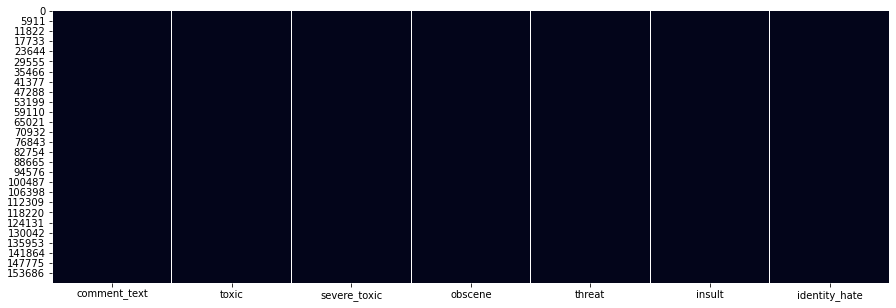

In [5]:
plt.figure(figsize=(15,5));
sns.heatmap(df.isna(), cbar=False);

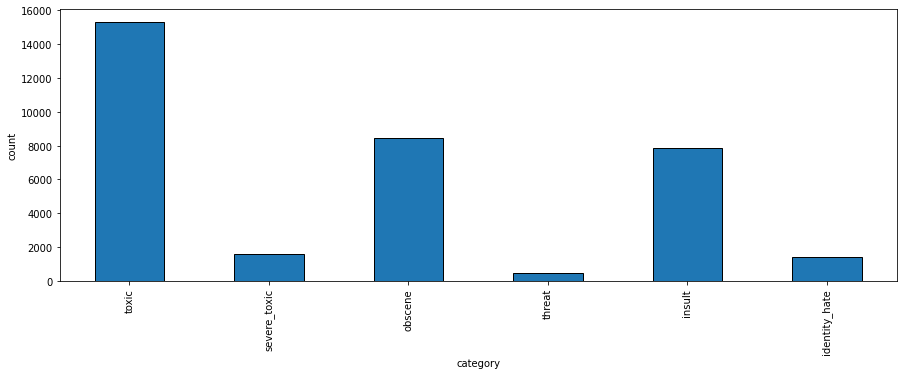

In [6]:
plt.figure(figsize=(15,5));
df.drop("comment_text", axis=1).sum(axis=0).plot(kind='bar', edgecolor='black');
plt.xlabel("category");
plt.ylabel("count");

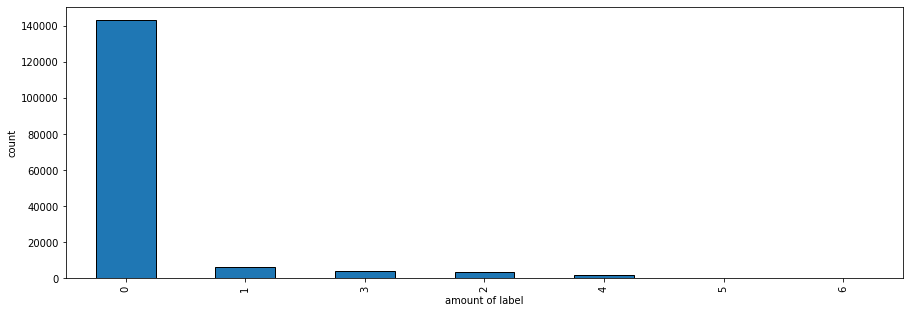

In [7]:
plt.figure(figsize=(15,5));
df.drop("comment_text", axis=1).sum(axis=1).value_counts().plot(kind='bar', edgecolor='black');
plt.ylabel("count");
plt.xlabel("amount of label");

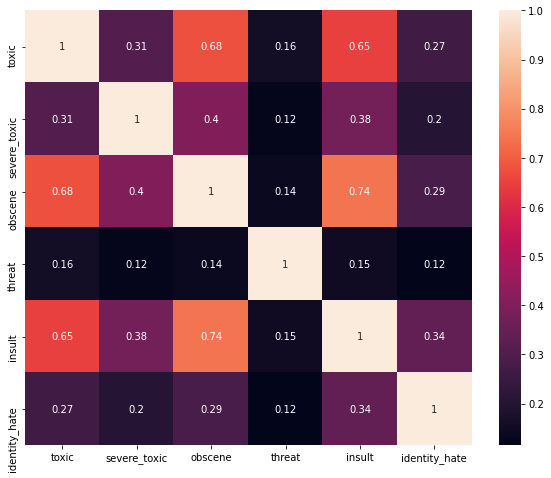

In [8]:
df_corr = df.drop("comment_text", axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True);

In [14]:
# pos weights
df[df.columns[1:]].count() / df[df.columns[1:]].sum()

toxic             10.433569
severe_toxic     100.044514
obscene           18.886377
threat           333.830544
insult            20.257839
identity_hate    113.573665
dtype: float64

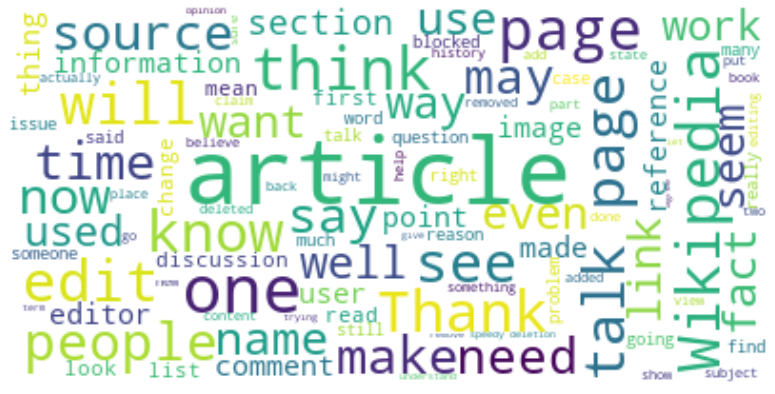

In [9]:
clean_df = df[df.drop("comment_text", axis=1).sum(axis=1) == 0]
text=clean_df.comment_text.values

plt.figure(figsize=(15,7));
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text));
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");

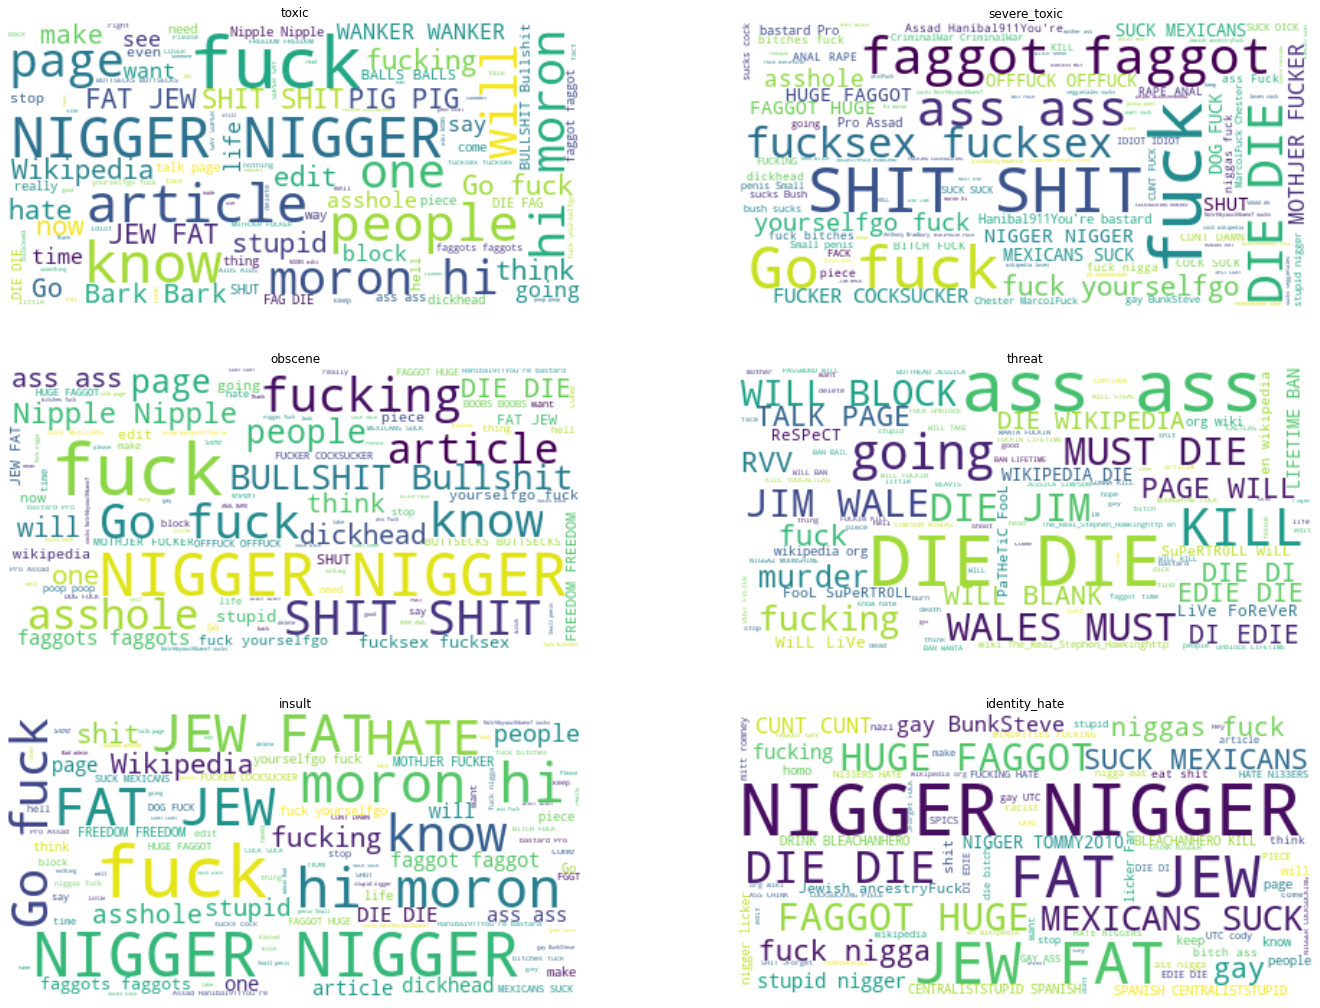

In [10]:
fix, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 18))

for i, cat in enumerate(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]):
    row = i // 2
    col = i % 2
    d = df[df[cat] == 1]
    text=d.comment_text.values

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text));
    ax[row, col].set_title(cat)
    ax[row, col].imshow(wordcloud, interpolation="bilinear");
    ax[row, col].axis("off");